In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [305]:
df = pd.read_csv('/content/insurance.csv')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [283]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [284]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Charges by age and sex

Text(0.5, 1.0, 'Distribution of charges by age and sex')

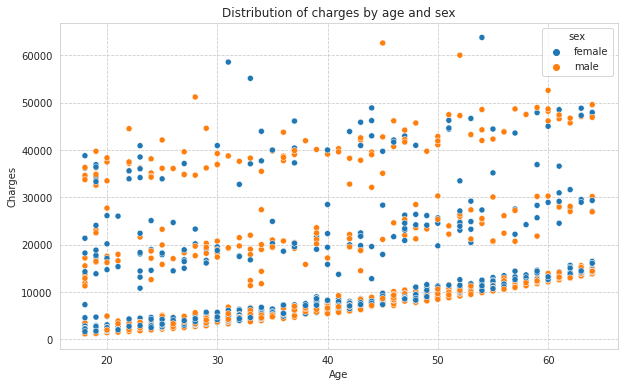

In [60]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "charges", data = df, hue = "sex")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and sex")

#Charges by smoker and BMI

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


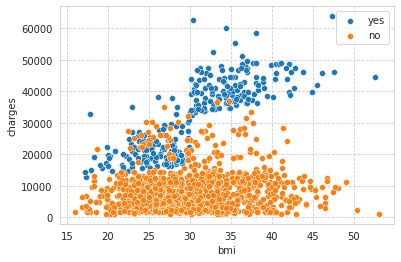

In [61]:
smokers = df["smoker"].unique()
colors = ["Reds", "Greens"]
for i, smoker in enumerate(smokers):
    temp = df[df["smoker"] == smoker]
    sns.scatterplot(temp["bmi"], temp["charges"], cmap = colors[i])
plt.legend(smokers)

#Charges by region and sex

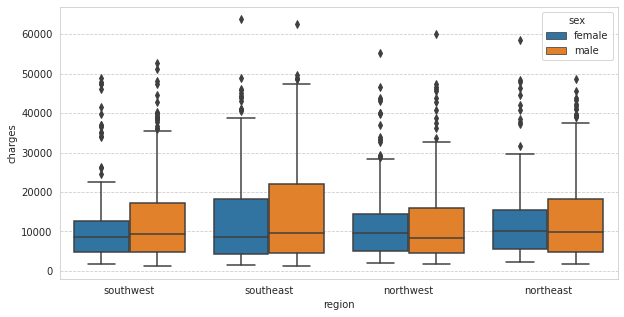

In [62]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "region", y = "charges", hue = "sex", data = df)

#Charges by age and smoker

Text(0.5, 1.0, 'Distribution of charges by age and sex')

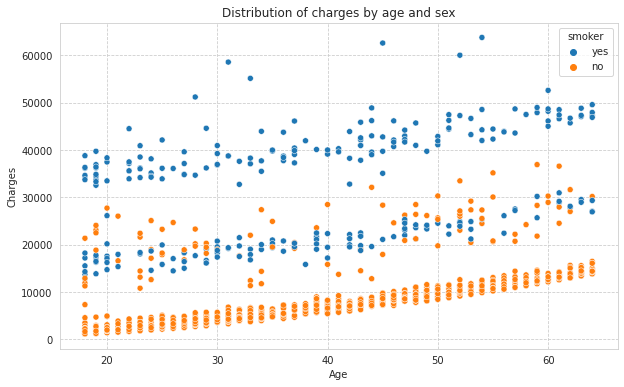

In [63]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "charges", data = df, hue = "smoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and sex")

#Charges by smoker and number of children

Text(0.5, 1.0, 'Distribution of charges by number of children')

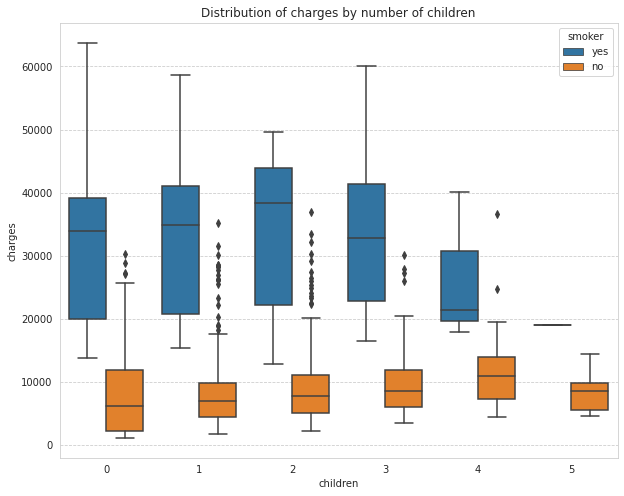

In [64]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "children", y = "charges",hue = "smoker", data = df)
plt.title("Distribution of charges by number of children")

#Correlation between features

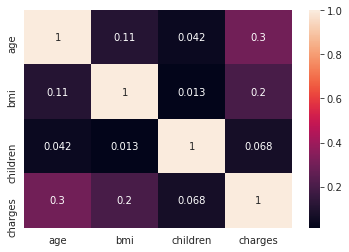

In [306]:
sns.heatmap(df.corr(), annot = True)

In [285]:
df['sex'] = df['sex'].map({'male' : 1, 'female' : 0})
df['smoker'] = df['smoker'].map({'yes' : 1, 'no' : 0})

In [286]:
#df["region_southeast"] = df["region"].apply(lambda x: 1 if x == "southeast" else 0)
#df['region'] = df['region'].map({'northeast' : 1, 'northwest' : 2, 'southeast' : 3, 'southwest' : 4})
df['region'] = df['region'].apply(lambda x: 1 if x == 'southeast' or 'southwest' else 0)

In [287]:
#df = df.drop(['region'], axis = 1)

In [288]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [289]:
Y = df['charges']
X = df.drop(['region', 'charges'], axis = 1)

In [293]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

In [263]:
scaled_data.shape

(1338, 5)

In [294]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size = 0.3,  random_state = 0)

In [299]:
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)

In [300]:
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [301]:
regr.score(X_test, Y_test)

0.8654784897403206

In [302]:
Y_pred = regr.predict(X_test)

In [303]:
mae=mean_absolute_error(Y_test, Y_pred)
mse=mean_squared_error(Y_test, Y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

3146.007999845202
21452073.28684632
4631.638294043083
